In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
login_times_agg = df.resample("15min").sum()

In [6]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


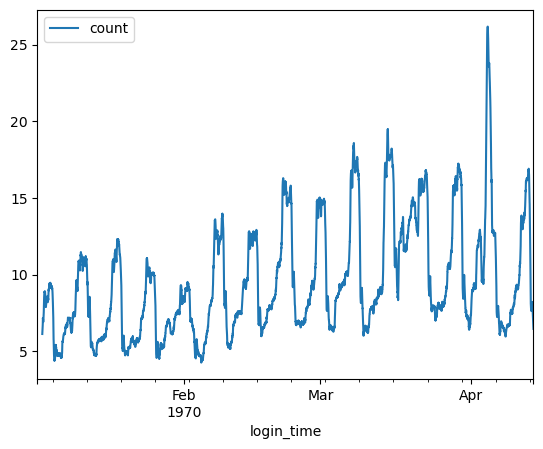

In [9]:
login_times_agg.rolling(window=96).mean().plot()
plt.show()
#Noticing the highest spike in April.

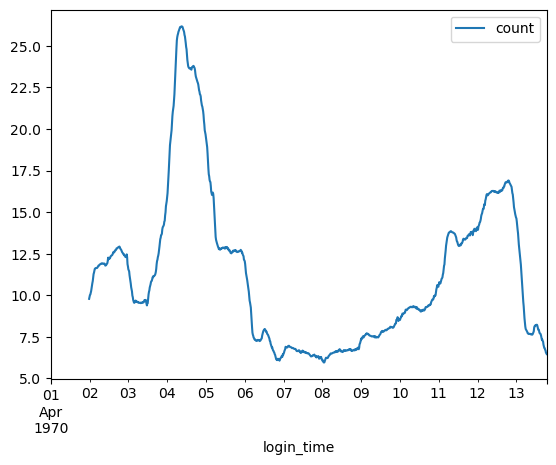

In [20]:
login_times_agg.loc['1970-04'].rolling(window=96).mean().plot()
plt.show()
#Month of logins. Seeing noticeable spikes on weekends.

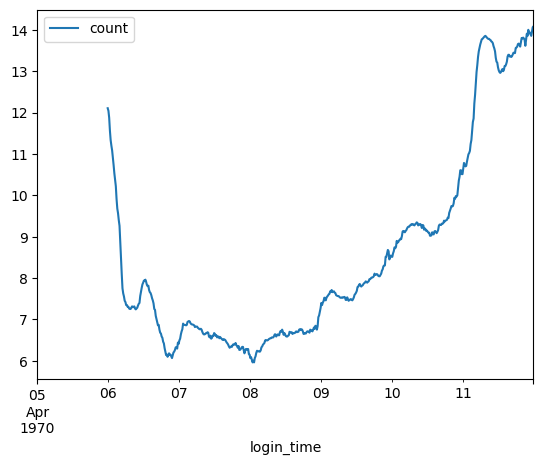

In [21]:
login_times_agg.loc['1970-04-05':'1970-04-11'].rolling(window=96).mean().plot()
plt.show()
#Week of logins. Confirming highest logins are on weekend days.

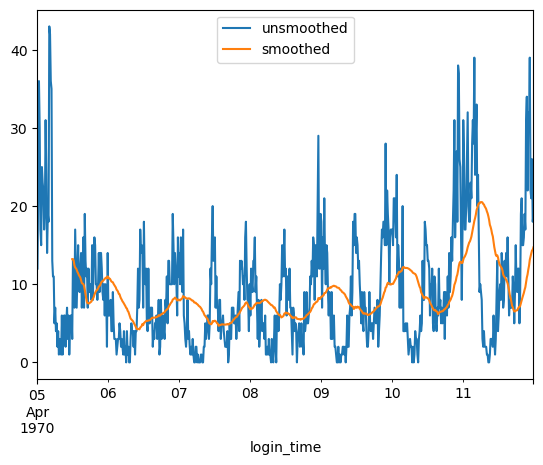

In [23]:
unsmoothed = login_times_agg['count']['1970-04-05':'1970-04-11']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()
#Sunday to Saturday logins

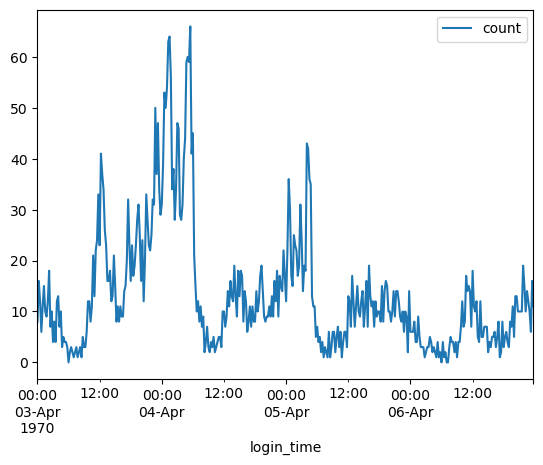

In [24]:
login_times_agg.loc['1970-04-03':'1970-04-06'].plot()
plt.show()
#April weekend logins. 
#From Friday to Monday you can see that Saturday between midnight and noon hold the highest logins.

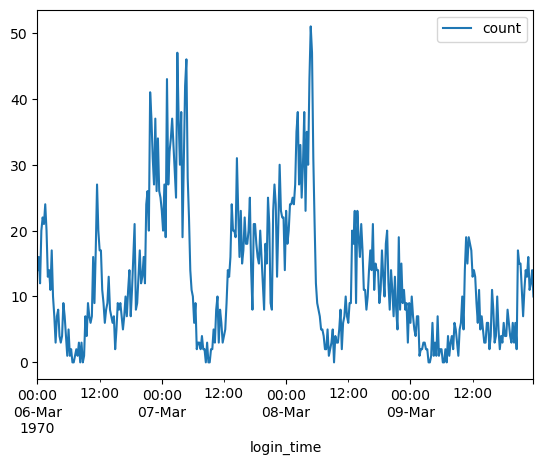

In [28]:
login_times_agg.loc['1970-03-06':'1970-03-09'].plot()
plt.show()
#March weekend logins.
#From Friday to Monday you can see that Saturday around midnight and 
#Sunday early morning hold the highest logins.

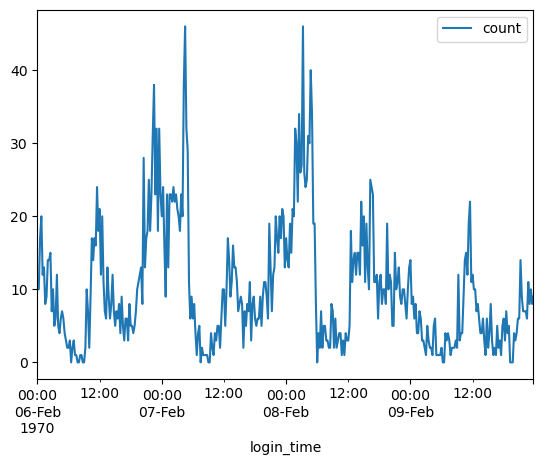

In [26]:
login_times_agg.loc['1970-02-06':'1970-02-09'].plot()
plt.show()
#February weekend logins.
#From Friday to Monday you can see that Saturday around midnight and 
#Sunday early morning hold the highest logins. Similar to March.

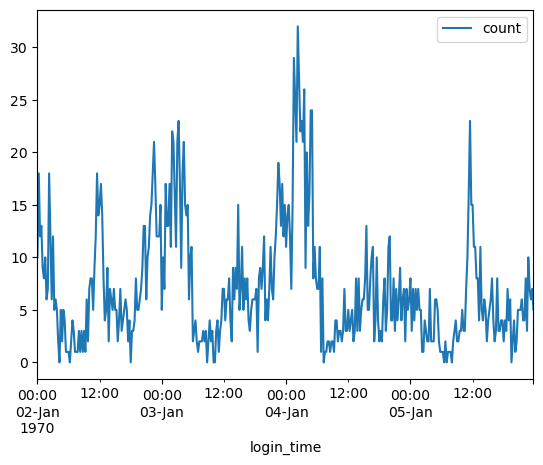

In [27]:
login_times_agg.loc['1970-01-02':'1970-01-05'].plot()
plt.show()
#January weekend logins.
#From Friday to Monday you can see that Sunday early morning hold the highest logins.
#Friday and Saturday are consistent and Monday afternoon peaks again. 

In [ ]:
#After aggregating these months, weeks, and weekend examples we can see that demand was greatest between 
#Friday evenings and Monday afternoons. 